In [1]:
import numpy as np
import sklearn.metrics as metrics
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import sklearn as sk
from PIL import Image, ImageOps, ImageDraw

2024-05-25 19:24:43.123865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 19:24:43.934953: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the binary file
data_train = np.load('games_train.npz', allow_pickle=True)
X_train = data_train['images']
X_train.astype('float32')
y_train = data_train['labels']
label_names = data_train['label_names']



print(label_names)

['CSGO' 'Fortnite' 'Forza Horizon' 'Genshin impact' 'Minecraft' 'Terraria'
 'Valorant']


In [3]:
data_test = np.load('games_test.npz', allow_pickle=True)
X_test = data_test['images']
X_test.astype('float32')
y_test = data_test['labels']
label_names = data_test['label_names']

print(label_names)

['CSGO' 'Fortnite' 'Forza Horizon' 'Genshin impact' 'Minecraft' 'Terraria'
 'Valorant']


In [4]:
def crop(X):
    X[:, :10, :, :] = 0  # First 5 rows
    X[:, -10:, :, :] = 0  # Last 5 rows

    X[:, :, :10, :] = 0  # First 5 columns
    X[:, :, -10:, :] = 0  # Last 5 columns

In [5]:
crop(X_test)
crop(X_train)

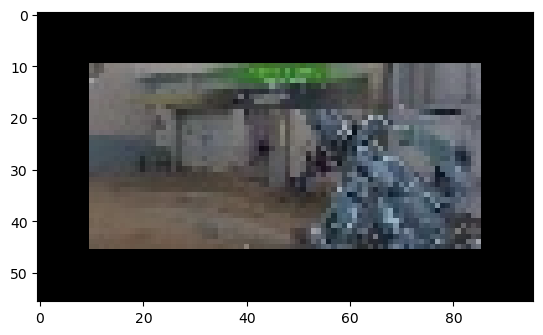

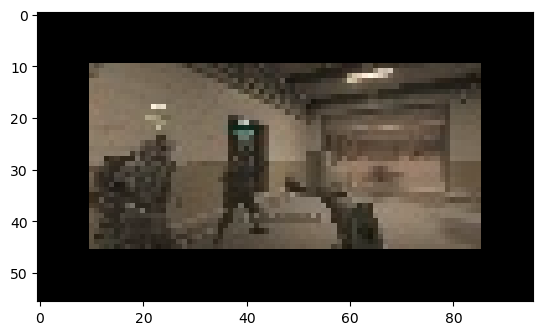

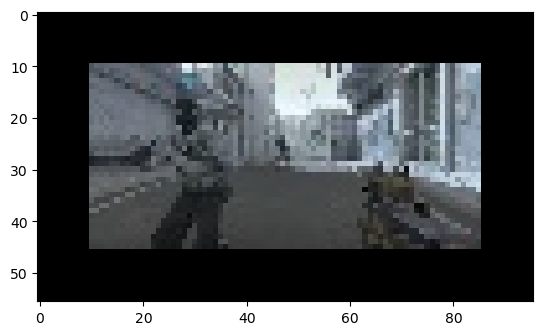

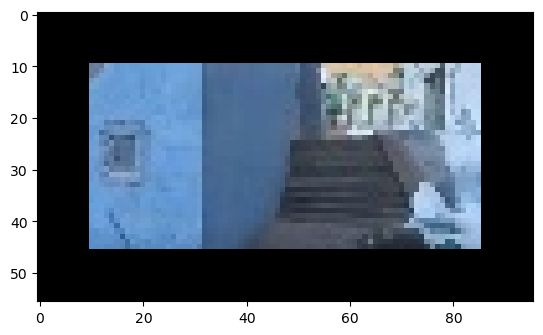

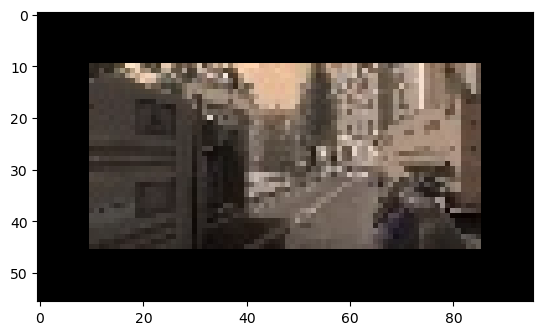

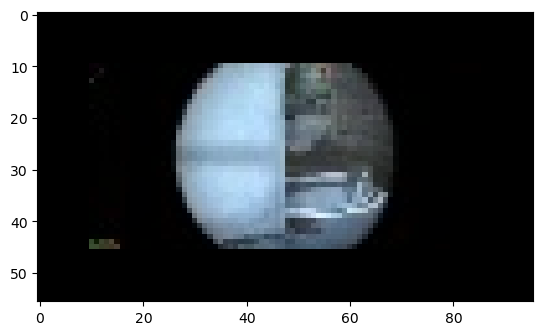

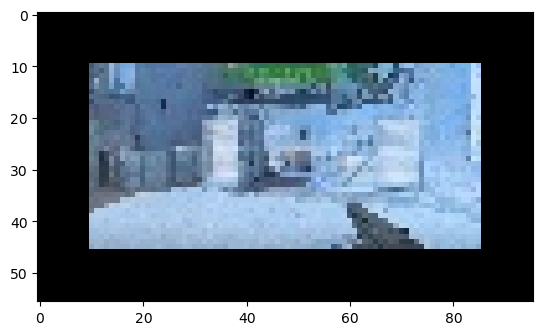

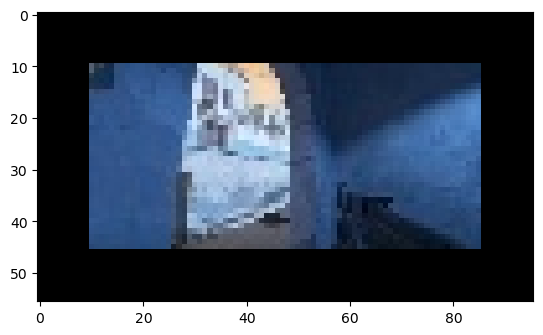

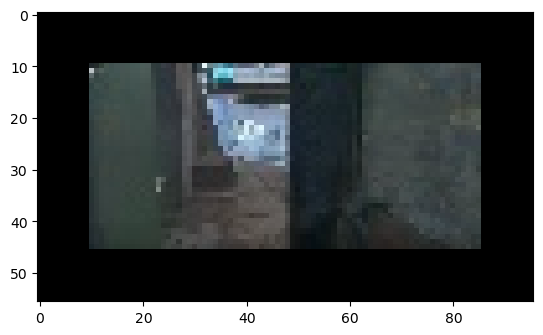

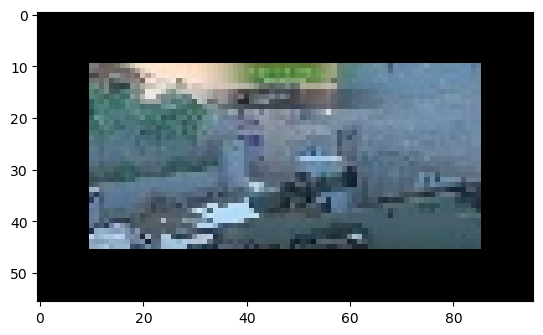

In [7]:
for i in range(10):
    plt.imshow(X_train[i])
    plt.show()

In [14]:
y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train)

In [15]:
def nn_model(input_shape: tuple, num_classes: int):
    model = tf.keras.Sequential([
        Dense(32, activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [16]:
def Cnn_model(input_shape: tuple, num_classes: int):
    model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(images.shape[1], images.shape[2], images.shape[3])),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [17]:
def train_model(model, x: np.array, y: np.array,
                x_test: np.array, y_test: np.array,
                batch_size: int = 32, epochs: int = 10):
    """
    Trains the model on the given data.

    :param keras.sequential model: the instanciated model to train
    :param numpy.array x: the training data
    :param numpy.array y: the true values
    :param numpy.array x_test: the test data
    :param numpy.array y_test: the true test values
    :param int batch_size: size of each processed batch
    :param int epochs: number of epochs
    """
    callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)
    model.fit(x, y, epochs=10, batch_size=64, callbacks=[callback], validation_data=(x_test, y_test))

In [18]:
model_0 = nn_model(X_train.shape[1:], 7)

In [ ]:
history = model_0.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10


2024-05-25 19:25:56.323366: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1354752000 exceeds 10% of free system memory.


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4099 - loss: 1.5358

2024-05-25 19:26:55.139852: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 451584000 exceeds 10% of free system memory.


657/657 ━━━━━━━━━━━━━━━━━━━━ 62s 93ms/step - accuracy: 0.4101 - loss: 1.5355 - val_accuracy: 0.4799 - val_loss: 1.3768
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 83s 126ms/step - accuracy: 0.6586 - loss: 0.9852 - val_accuracy: 0.6486 - val_loss: 1.0748
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 76s 115ms/step - accuracy: 0.7435 - loss: 0.7775 - val_accuracy: 0.7119 - val_loss: 0.8904
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 65s 99ms/step - accuracy: 0.7987 - loss: 0.6235 - val_accuracy: 0.6806 - val_loss: 0.9706
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 89s 110ms/step - accuracy: 0.8254 - loss: 0.5294 - val_accuracy: 0.7399 - val_loss: 0.7893
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 68s 104ms/step - accuracy: 0.8445 - loss: 0.4703 - val_accuracy: 0.7223 - val_loss: 0.9497
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 65s 98ms/step - accuracy: 0.8627 - loss: 0.4216 - val_accuracy: 0.7443 - val_loss: 0.7881
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 79s 120ms/step - accuracy: 0.8753 - loss: 0.3766 - val_ac

In [18]:
model = Cnn_model(X_train.shape[1:], 7)

/home/remix375/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-25 18:20:59.992018: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-25 18:20:59.992172: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: remix375-Vivobook-ASUSLaptop-M7600QE-M7600QE
2024-05-25 18:20:59.992194: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: remix375-Vivobook-ASUSLaptop-M7600QE-M7600QE
2024-05-25 18:20:59.992341: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 555.42.2
2024-0

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

In [ ]:
def predict(model, x: np.array, labels: list, file_name: str = None) -> np.array:
    """
    Plots the figures for which we want to predict the class alongside
    the predicted probabilities of each class.

    :param model: Keras model
    :param numpy.array x: a few test points to predict
    :param list labels: the list of labels associated with classes 0, ..., 9
    :param str file_name: (optional) filename to save the plot
    :return: the class prediction
    """
    lab = ['CSGO', 'Fortnite', 'Forza Horizon', 'Genshin impact', 'Minecraft', 'Terraria',
 'Valorant']


    y = model.predict(x)
    f, axes = plt.subplots(x.shape[0], 2, figsize=(33, 24))
    for i in range(x.shape[0]):
        axes[i, 0].imshow(x[i])
        axes[i, 1].barh(lab, y[i])
        
    if file_name:
        plt.savefig(file_name)
    else:
        plt.show()
    return y

In [ ]:
predict(model, X_test[:10], y_test[:10])

In [23]:

def confusion_matrix(model, x_test: np.array, y_test: np.array, labels: list) -> pd.DataFrame:
    """
    Predict on x_test using model
    Use sklearn.metrics.confusion_matrix to get the matrix
    Prettify the result

    :param model: keras model
    :param numpy.array x: a few test points to predict
    :param numpy.array x: true values associated with x_test
    :param list labels: list of names of labels
    """
    lab = ['CSGO', 'Fortnite', 'Forza Horizon', 'Genshin impact', 'Minecraft', 'Terraria',
 'Valorant']

    
    pred = model.predict(x_test)
    df = pd.DataFrame(metrics.confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1)))
    # making the table look fancy
    df.style.set_properties(**{'width':'6em', 'text-align':'center'}).set_table_styles([dict(selector="th", props=[('text-align', 'center')])])
    df = df.rename({i: lab[i] for i in range(len(lab))}, axis='columns')
    df = df.rename({i: lab[i] for i in range(len(lab))})
    return df

In [24]:
conf_matrix = confusion_matrix(model_0, X_test, y_test, labels)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [25]:
conf_matrix

,CSGO,Fortnite,Forza Horizon,Genshin impact,Minecraft,Terraria,Valorant
CSGO,156,6,5,13,9,5,9
Fortnite,7,185,5,7,13,1,6
Forza Horizon,9,7,142,2,7,8,3
Genshin impact,26,24,4,127,22,5,7
Minecraft,3,8,3,9,153,1,6
Terraria,0,2,0,2,3,204,0
Valorant,32,7,5,8,14,0,120
